In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
homework = pd.read_csv('../data/HomeWork.csv', index_col=0)

In [3]:
homework.sort_values('date')

status    income   age        date
309      Student    4000.0  21.0  2022-01-01
62   Businessman  891000.0  68.0  2022-01-01
464    Pensioner       NaN  88.0  2022-01-01
353    Pensioner    8000.0  96.0  2022-01-01
304      Working   60000.0  60.0  2022-01-01
..           ...       ...   ...         ...
205      Student   -3517.0  20.0  2022-02-01
316    Pensioner   28000.0  74.0  2022-02-01
255    Pensioner   18000.0  92.0  2022-02-01
387  Businessman       NaN  76.0  2022-02-01
288  Businessman  883000.0   NaN  2022-02-01

[500 rows x 4 columns]

### Посмотрим распределения признаков

#### Age

In [4]:
homework["age"].describe()

count    441.000000
mean      46.362812
std       25.036517
min        0.000000
25%       23.000000
50%       44.000000
75%       68.000000
max       99.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

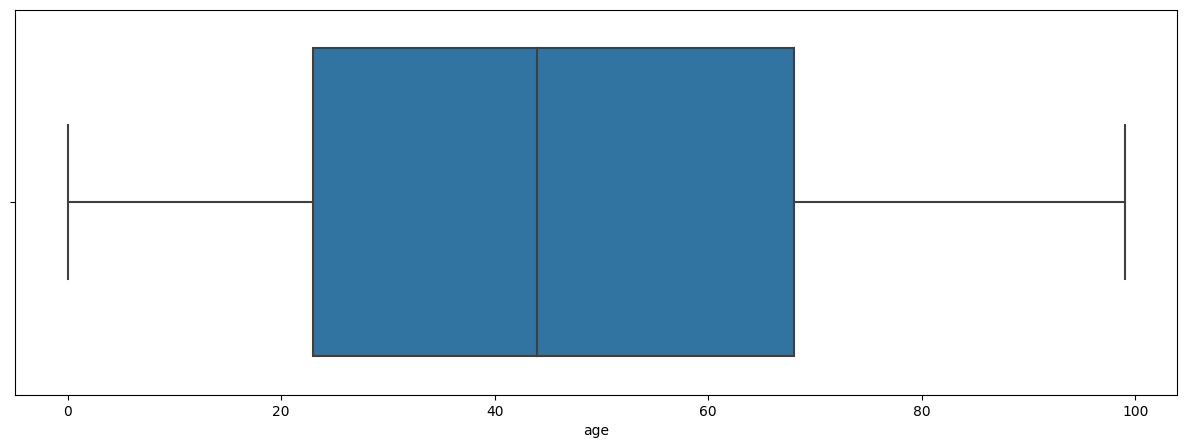

In [5]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=homework["age"])

In [6]:
homework["age"].isnull().sum()

59

По средним значениям и графику видно, что в возрасте выбросов нет. Если знать страну, в которой собирались эти данные можно провести анализ адекватности данных сравнив с демографической пирамидой. 

Присутствует значимое (59 из 500) количество Nan. В данном случае можно попробовать заменить возраст человека на средний возраст его группы (студент, пенсионер и тд).

#### Income

In [7]:
homework["income"].describe()

count       430.000000
mean     152020.623256
std      242647.036978
min      -13745.000000
25%        2000.000000
50%       21000.000000
75%      217000.000000
max      992000.000000
Name: income, dtype: float64

<Axes: xlabel='income'>

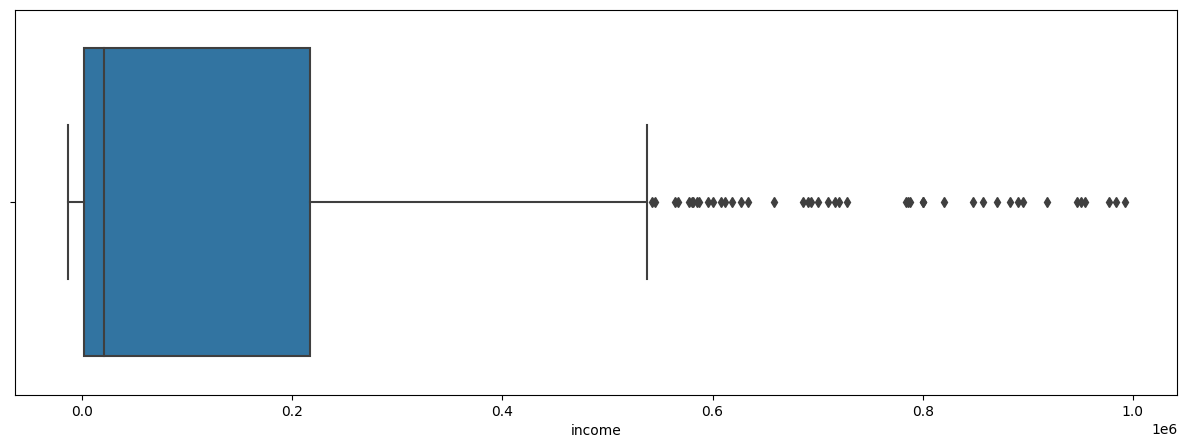

In [8]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=homework["income"])

In [9]:
homework["income"].isnull().sum()

70

По доходу в целом не удивительно что присутствуют выбросы, так как доходы могут очень сильно отличаться. Отсутствующих значений всего 70, но сложно придумать какой-то простой способ от них избавиться. 

#### Status

In [10]:
homework["status"].describe()

count         490
unique          4
top       Student
freq          145
Name: status, dtype: object

In [11]:
homework["status"].isnull().sum()

10

Отсутствующих значений всего 10, поэтому считаю что их можно выкинуть. Если бы таких значений было много, то можно было бы по возрасту определить студента или пенсионера. Проблемой будут работающие люди молодого возраста, но, как мне кажется, для бизнес метрик слишком большой разницы между студентом и человеком, который работает с небольшим опытом разница не будет большой. Отличить рабочего или бизнесмена вряд ли можно как по возрасту, так и по доходу. Поэтому тех, кто по возрасту не подходит ни к студентам, ни к пенсионерам придётся выкинуть в любом случае.

### Обработаем данные

#### Status

In [12]:
homework_processed = homework.dropna(subset="status")

#### Age

In [13]:
homework_processed["age"].describe()

count    431.000000
mean      46.317865
std       24.977639
min        0.000000
25%       23.000000
50%       43.000000
75%       68.000000
max       99.000000
Name: age, dtype: float64

In [14]:
age_by_status = homework_processed.groupby("status")["age"].median()
age_by_status

status
Businessman    54.0
Pensioner      76.5
Student        20.0
Working        42.0
Name: age, dtype: float64

In [15]:
def fill_na_age(row: pd.Series) -> pd.Series:
    """ Функция заменяет пропущенный возраст на средний возраст в группе человека.

    Args:
        row (pd.Series): _description_

    Returns:
        pd.Series: _description_
    """
    if isinstance(row["age"], float):
        row["age"] = age_by_status[row["status"]]
    return row

In [16]:
homework_processed = homework_processed.apply(fill_na_age, axis=1)

In [17]:
homework_processed["age"].isnull().sum()

0

#### Income

Как мне кажется, нельзя достаточно аргументированно заменить доход какой-нибудь статистикой выборки. Как вариант можно было бы заменить пропуски в доходе пенсионера средним. Но для справедливости такой замены нужно больше информации о том, например, какая пенсионная программа реализована в стрене, в которой собраны данные. 

In [18]:
homework_processed = homework_processed.dropna(subset="income")

In [19]:
homework_processed

status    income   age        date
0        Student    4000.0  20.0  2022-01-23
2        Student    4000.0  20.0  2022-01-03
3        Student       0.0  20.0  2022-01-13
4      Pensioner    5000.0  76.5  2022-01-31
5        Student    1000.0  20.0  2022-01-25
..           ...       ...   ...         ...
495    Pensioner   28000.0  76.5  2022-01-30
496    Pensioner   16000.0  76.5  2022-01-20
497  Businessman  258000.0  54.0  2022-01-12
498      Student    4000.0  20.0  2022-01-19
499    Pensioner    5000.0  76.5  2022-01-03

[422 rows x 4 columns]